<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/quickstart_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Learn the Basics](intro.html) \|\| **Quickstart** \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Quickstart
==========

This section runs through the API for common tasks in machine learning.
Refer to the links in each section to dive deeper.

Working with data
-----------------

PyTorch has two [primitives to work with
data](https://pytorch.org/docs/stable/data.html):
`torch.utils.data.DataLoader` and `torch.utils.data.Dataset`. `Dataset`
stores the samples and their corresponding labels, and `DataLoader`
wraps an iterable around the `Dataset`.


In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

PyTorch offers domain-specific libraries such as
[TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and
[TorchAudio](https://pytorch.org/audio/stable/index.html), all of which
include datasets. For this tutorial, we will be using a TorchVision
dataset.

The `torchvision.datasets` module contains `Dataset` objects for many
real-world vision data like CIFAR, COCO ([full list
here](https://pytorch.org/vision/stable/datasets.html)). In this
tutorial, we use the FashionMNIST dataset. Every TorchVision `Dataset`
includes two arguments: `transform` and `target_transform` to modify the
samples and labels respectively.


In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 268kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.99MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.1MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Iterating and Visualizing the Dataset

60000
18035
55155
23466
38234
57057
50489
37999
47645
8515


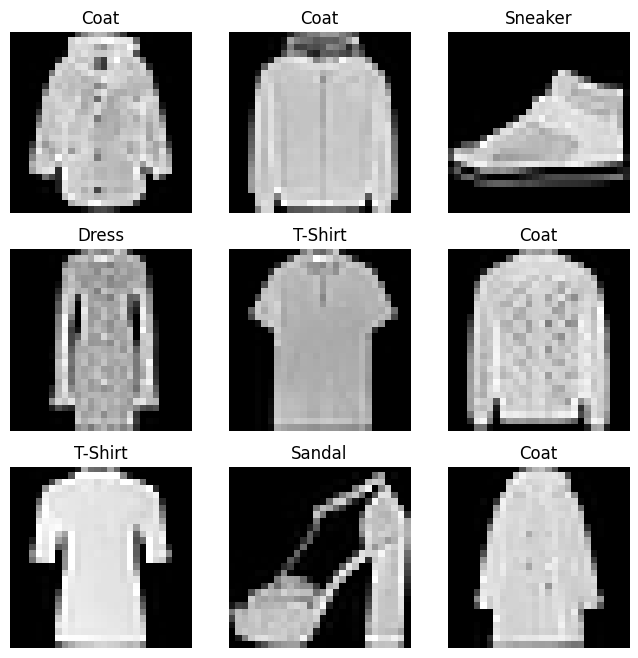

In [11]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
# this converts all the labels into a form that we can understand

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
# this defines a space to plot our data , with 3 rows and 3 columns

print(len(training_data))
# we see that we have 60000 samples


for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # we get a random id
    print(sample_idx)
    img, label = training_data[sample_idx]
    # from the id we get a tuple (image tensor , label)
    figure.add_subplot(rows, cols, i)
    # plot it
    plt.title(labels_map[label])
    # converts the labels to text , so we can understand it
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    # convert image to greyscale
plt.show()

We pass the `Dataset` as an argument to `DataLoader`. This wraps an
iterable over our dataset, and supports automatic batching, sampling,
shuffling and multiprocess data loading. Here we define a batch size of
64, i.e. each element in the dataloader iterable will return a batch of
64 features and labels.


In [12]:
batch_size = 64
# Batch size refers to the number of samples processed before the model's
# internal parameters (like weights) are updated during training in machine
# learning and deep learning.


# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


# X is a batch of input data(image in this case)
# Y is the corresponding labels for batch of input data
for X, y in test_dataloader:

    # N is batch size (no of samples in the batch)
    # C is the number of channels in each input(1 for grascale img , 3 for rgb)
    # H is the height of each image
    # W is the width of each image


    # X.shape is of [N,C,H,W] format
    # Typically, y.shape will be [N], where N is the batch size.
    # This means there is one label for each input in the batch.

    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


Read more about [loading data in PyTorch](data_tutorial.html).


------------------------------------------------------------------------


Creating Models
===============

To define a neural network in PyTorch, we create a class that inherits
from
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
We define the layers of the network in the `__init__` function and
specify how data will pass through the network in the `forward`
function. To accelerate operations in the neural network, we move it to
the GPU or MPS if available.


In [13]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


# Define the model class
class NeuralNetwork(nn.Module):  # Inherit from PyTorch's nn.Module
    def __init__(self):
        super().__init__()  # Initialize the parent class (nn.Module)

        # Define a layer to flatten input tensors from [N, C, H, W] to [N, C*H*W]
        self.flatten = nn.Flatten()
        # [N,1,28,28]-->[N,1*28*28]

        # Define a sequence of layers for the network
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),  # Fully connected layer: 28*28 pixels -> 512 neurons
            nn.ReLU(),              # ReLU activation function
            nn.Linear(512, 512),    # Fully connected layer: 512 -> 512 neurons
            nn.ReLU(),              # ReLU activation function , it turns negative values to zero
            nn.Linear(512, 10)      # Fully connected layer: 512 -> 10 neurons (output classes)
        )

    # Forward pass: Defines how input data flows through the network
    def forward(self, x):
        x = self.flatten(x)          # Flatten the input image to a 1D vector
        logits = self.linear_relu_stack(x)  # Pass the flattened input through the stack of layers
        return logits                # Return the raw output (logits)

# Create the model instance and move it to the specified device (CPU or GPU)
model = NeuralNetwork().to(device)

# Print the model architecture
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Read more about [building neural networks in
PyTorch](buildmodel_tutorial.html).


------------------------------------------------------------------------


Optimizing the Model Parameters
===============================

To train a model, we need a [loss
function](https://pytorch.org/docs/stable/nn.html#loss-functions) and an
[optimizer](https://pytorch.org/docs/stable/optim.html).


In [14]:
# Define the loss function
loss_fn = nn.CrossEntropyLoss()
# CrossEntropyLoss combines:
#   - LogSoftmax: Converts raw logits into log probabilities.
#   - Negative Log-Likelihood Loss: Measures the difference between predicted probabilities and true labels.
# Use this for multi-class classification tasks.

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# SGD: Stochastic Gradient Descent, a common optimization algorithm.
# - model.parameters(): Passes the model's parameters to the optimizer so it knows what to update.
# - lr=1e-3: Sets the learning rate (step size for updates).

In a single training loop, the model makes predictions on the training
dataset (fed to it in batches), and backpropagates the prediction error
to adjust the model\'s parameters.


In [15]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)  # Total number of samples in the dataset
    model.train()  # Set the model to training mode (activates features like dropout, batch norm)

    for batch, (X, y) in enumerate(dataloader):  # Iterate through batches
        # Move data and labels to the specified device (CPU or GPU)
        X, y = X.to(device), y.to(device)

        # Compute prediction and calculate loss
        pred = model(X)           # Forward pass: Get model predictions for input X
        loss = loss_fn(pred, y)   # Compute the loss between predictions and true labels

        # Backpropagation to compute gradients
        loss.backward()           # Calculate gradients of the loss with respect to model parameters
        optimizer.step()          # Update model parameters based on gradients
        optimizer.zero_grad()     # Reset gradients to avoid accumulation

        # Print progress every 100 batches
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)  # Get current loss and sample count
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")  # Log loss and progress


We also check the model\'s performance against the test dataset to
ensure it is learning.


In [16]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)  # Total number of samples in the dataset
    num_batches = len(dataloader)  # Total number of batches in the dataloader
    model.eval()  # Set the model to evaluation mode (disables dropout, batch norm updates)

    # Initialize variables to accumulate loss and count correct predictions
    test_loss, correct = 0, 0

    # Disable gradient computation for evaluation (saves memory and speeds up computations)
    with torch.no_grad():
        for X, y in dataloader:  # Iterate through the test dataset in batches
            X, y = X.to(device), y.to(device)  # Move data and labels to the same device as the model

            # Forward pass: Get predictions from the model
            pred = model(X)

            # Accumulate the test loss
            test_loss += loss_fn(pred, y).item()  # Add the loss for this batch

            # Count the number of correct predictions
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            # pred.argmax(1): Index of the class with the highest score for each sample
            # (pred.argmax(1) == y): Boolean tensor indicating correct predictions
            # .sum().item(): Counts the number of correct predictions and converts it to a Python float

    # Compute the average loss across all batches
    test_loss /= num_batches

    # Compute accuracy as the fraction of correctly predicted samples
    correct /= size

    # Print the test results
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


The training process is conducted over several iterations (*epochs*).
During each epoch, the model learns parameters to make better
predictions. We print the model\'s accuracy and loss at each epoch;
we\'d like to see the accuracy increase and the loss decrease with every
epoch.


In [17]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.291164  [   64/60000]
loss: 2.277608  [ 6464/60000]
loss: 2.257710  [12864/60000]
loss: 2.256182  [19264/60000]
loss: 2.230392  [25664/60000]
loss: 2.197989  [32064/60000]
loss: 2.211783  [38464/60000]
loss: 2.171612  [44864/60000]
loss: 2.165118  [51264/60000]
loss: 2.133054  [57664/60000]
Test Error: 
 Accuracy: 47.1%, Avg loss: 2.126137 

Epoch 2
-------------------------------
loss: 2.136465  [   64/60000]
loss: 2.120872  [ 6464/60000]
loss: 2.062234  [12864/60000]
loss: 2.081539  [19264/60000]
loss: 2.016933  [25664/60000]
loss: 1.955593  [32064/60000]
loss: 1.980476  [38464/60000]
loss: 1.897045  [44864/60000]
loss: 1.896902  [51264/60000]
loss: 1.820390  [57664/60000]
Test Error: 
 Accuracy: 59.9%, Avg loss: 1.824966 

Epoch 3
-------------------------------
loss: 1.859795  [   64/60000]
loss: 1.822054  [ 6464/60000]
loss: 1.713081  [12864/60000]
loss: 1.752915  [19264/60000]
loss: 1.636796  [25664/60000]
loss: 1.598245  [32064/600

Read more about [Training your model](optimization_tutorial.html).


------------------------------------------------------------------------


Saving Models
=============

A common way to save a model is to serialize the internal state
dictionary (containing the model parameters).


In [18]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Loading Models
==============

The process for loading a model includes re-creating the model structure
and loading the state dictionary into it.


In [19]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

This model can now be used to make predictions.


In [22]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


Read more about [Saving & Loading your
model](saveloadrun_tutorial.html).
